In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from pprint import pprint 
from model import Factory, Paper,  Char,  Mizu,  Sho, Score,Contour, Recognizer
#自作モジュール
import my_cv

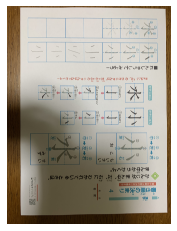

In [2]:
img = cv2.imread("./image/work8.png")
my_cv.display_color(img)

(4032, 3024, 3)


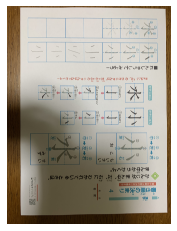

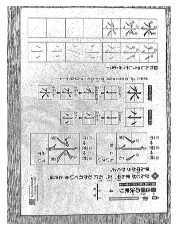

(228492,)
(14155, 1, 2)


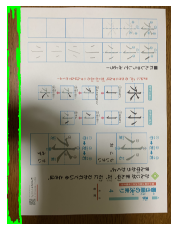

IndexError: index 2 is out of bounds for axis 0 with size 2

In [3]:
img_ori = cv2.imread('./image/work8.png')#画像読み込み
print(np.shape(img_ori))
my_cv.display_color(img_ori)
#紙の部分を切り出す
img_paper = my_cv.cutting_paper(img_ori)
my_cv.display_color(img_paper)

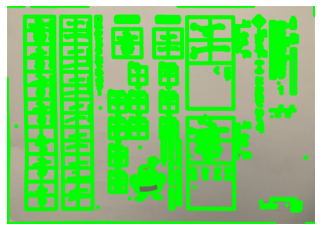

16


In [5]:
paper = Paper(img_paper,"Sho","Mizu")

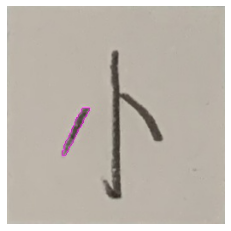

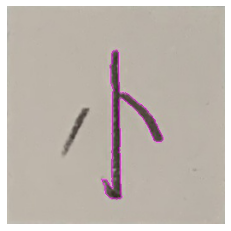

['かんじのかたちがへんだね、かきわすれやせんがつながっていないかかくにんしよう']


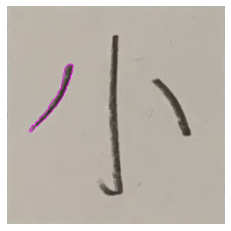

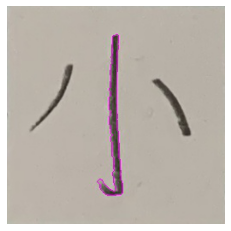

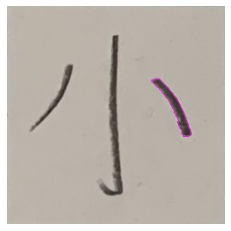

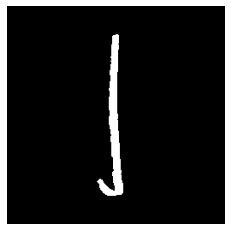

a
[105 205]


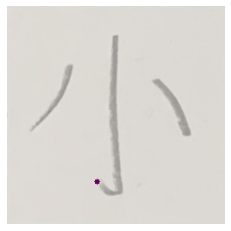

[117 221]


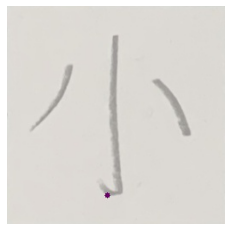

[126 214]


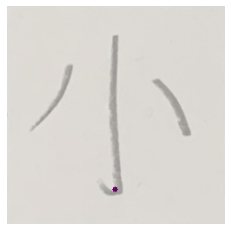

['いっかくめがきれいにかけてるね', 'はねれているね', '３かくめがきれいにかけてるね']


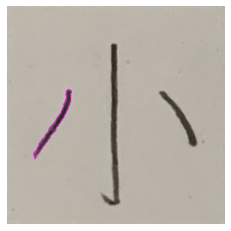

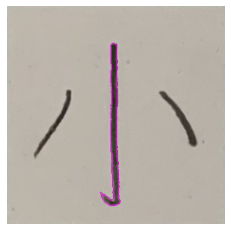

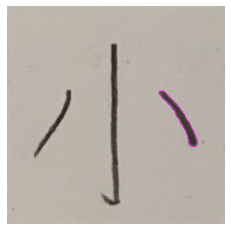

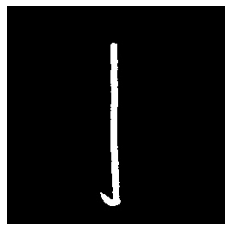

a
[109 218]


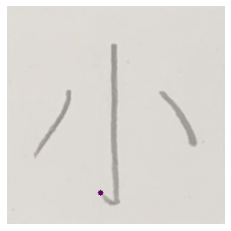

[120 233]


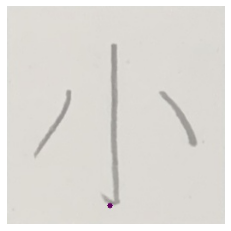

[124 225]


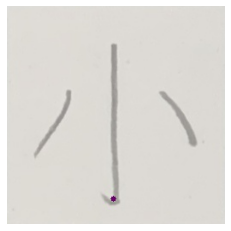

['いっかくめがきれいにかけてるね', 'はねれているね', '３かくめがきれいにかけてるね']


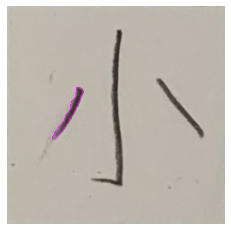

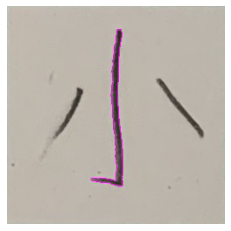

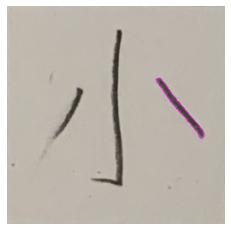

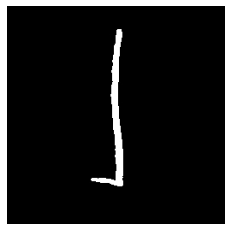

a
[ 98 203]


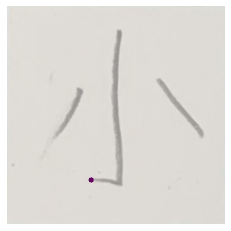

[134 210]


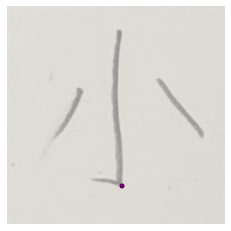

[127 202]


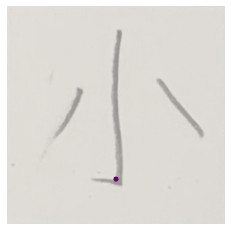

['いっかくめがきれいにかけてるね', 'はねのむきにきをつけよう。ひだりうえにむかってきれいにはねよう', '３かくめがきれいにかけてるね']


In [4]:
#area_scopeを概算するために出力してみる
for char in paper.char1s:
    for contour in char.basic_contours:
        contour.display()
    pprint(char.get_score())

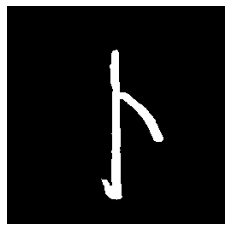

(255, 255)


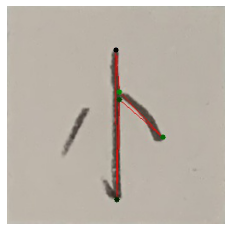

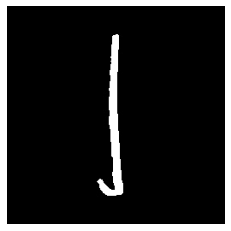

(255, 255)


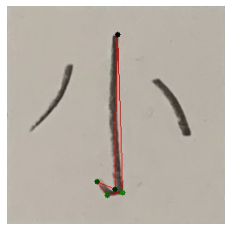

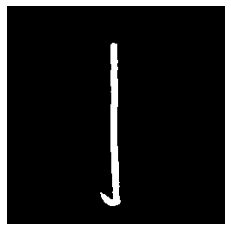

(255, 255)


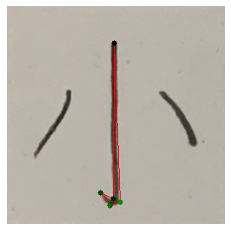

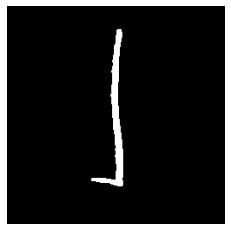

(255, 255)


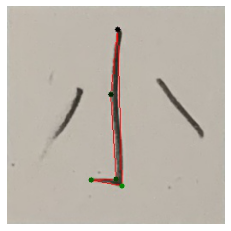

In [5]:
#　線分化

pnum = 5
for char in paper.char1s:
    img_fltr =  my_cv.mor_clear_filter(char.basic_contours[1].img_thresh)
    my_cv.display_gray(img_fltr)
    print(np.shape(img_fltr))
    cnts,_ = cv2.findContours(img_fltr,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    resimg = char.img_sq.copy()
    # 輪郭の周囲に比例する精度で輪郭を近似する
    if len(cnts)  >1 :
        print("ERROR")
        break
    #1.2をかけることで大きい図形に対してのバイアスを強くしている
    for i in range(10000):
        approx = cv2.approxPolyDP(cnts[0], 30-i*0.01, True) #第２引数が小さければ細かい近似大きければ大雑把な近似 1.2をかけること
        #左端の点に隣接している2つのぽいんとがy軸上で横もしくは下にあるかなかったら羽の向きがおかしいか曲がっているか
        if pnum+2 >= len(approx) >= pnum:         
            cv2.polylines(resimg, [approx.reshape(-1,2)], True, (0,0,255), thickness=1, lineType=cv2.LINE_8)
            for i,app in enumerate(approx):
                cv2.circle(resimg, (app[0][0],app[0][1]), 3, (0, 0+35*i, 0), thickness=-1)
            my_cv.display_color(resimg)
            break